In [33]:
import numpy as np
from numpy.linalg import svd, matrix_rank
import pandas as pd
import matplotlib.pyplot as plt
from IPython import get_ipython
from util import (
    svdcomp,
    nextplot,
    plot_matrix,
    plot_xy,
    plot_cov,
    match_categories,
)  # see util.py
from sklearn.cluster import KMeans

# setup plotting
import psutil
inTerminal = not "IPKernelApp" in get_ipython().config
inJupyterNb = any(filter(lambda x: x.endswith("jupyter-notebook"), psutil.Process().parent().cmdline()))
inJupyterLab = any(filter(lambda x: x.endswith("jupyter-lab"), psutil.Process().parent().cmdline()))
if not inJupyterLab:
    from IPython import get_ipython
    get_ipython().run_line_magic("matplotlib", "" if inTerminal else "notebook" if inJupyterNb else "widget")

# 1 Intuition on SVD

In [34]:
M1 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ]
)

M2 = np.array(
    [
        [0, 0, 0, 0, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 0, 0, 0, 0],
    ]
)

M3 = np.array([[0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1]])

M4 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
    ]
)

M5 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 0, 1, 1, 1],
    ]
)

M6 = np.array(
    [
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
    ]
)

## 1b

### SVD computation

In [35]:
matrices = {"M1": M1, "M2": M2, "M3": M3, "M4": M4, "M5": M5, "M6": M6}

for name, matrix in matrices.items():
    # Compute the SVD
    U, s, Vt = np.linalg.svd(matrix)
    S = np.diag(s)
    
    # Display results
    print("="*50)
    print(f"SVD Results for Matrix {name}:")
    print("="*50)
    
    print(f"Matrix {name}:")
    print(matrix)
    print("\nU (Left singular vectors):")
    print(U)
    print("\nSingular values (Diagonal elements of S):")
    print(s)
    print("\nV[transposed] (Right singular vectors):")
    print(Vt)
    print("\n")



SVD Results for Matrix M1:
Matrix M1:
[[1 1 1 0 0]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

U (Left singular vectors):
[[-5.77e-01  8.16e-01 -1.57e-16  0.00e+00  0.00e+00]
 [-5.77e-01 -4.08e-01 -7.07e-01  0.00e+00  0.00e+00]
 [-5.77e-01 -4.08e-01  7.07e-01  0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  1.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  1.00e+00  0.00e+00]]

Singular values (Diagonal elements of S):
[3.00e+00 2.56e-17 2.11e-48 0.00e+00 0.00e+00]

V[transposed] (Right singular vectors):
[[-0.58 -0.58 -0.58 -0.   -0.  ]
 [ 0.82 -0.41 -0.41  0.    0.  ]
 [ 0.   -0.71  0.71  0.    0.  ]
 [ 0.    0.    0.    0.    1.  ]
 [ 0.    0.    0.    1.    0.  ]]


SVD Results for Matrix M2:
Matrix M2:
[[0 0 0 0 0]
 [0 2 1 2 0]
 [0 2 1 2 0]
 [0 2 1 2 0]
 [0 0 0 0 0]]

U (Left singular vectors):
[[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  1.00e+00]
 [-5.77e-01  8.16e-01 -2.22e-16  0.00e+00  0.00e+00]
 [-5.77e-01 -4.08e-01 -7.07e-01  0.00e+00  0.00e+00]
 [-5.77e-01 

## 1c

### Compute and plot the best rank-1 approximation for each matrix

Rank-1 Approximation:


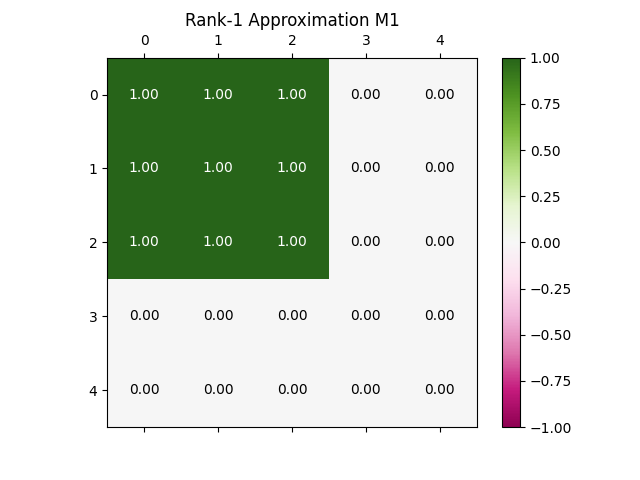

Rank-1 Approximation:


/Users/artembislyuk/Desktop/IE675b-machine-learning/Assignment 3/util.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()  # this creates a new plot


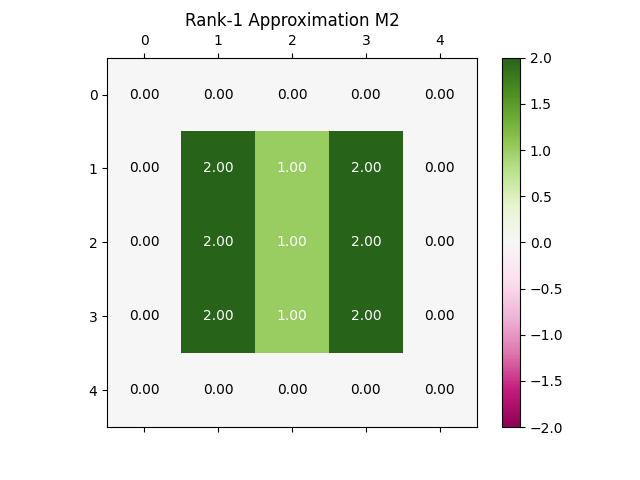

Rank-1 Approximation:


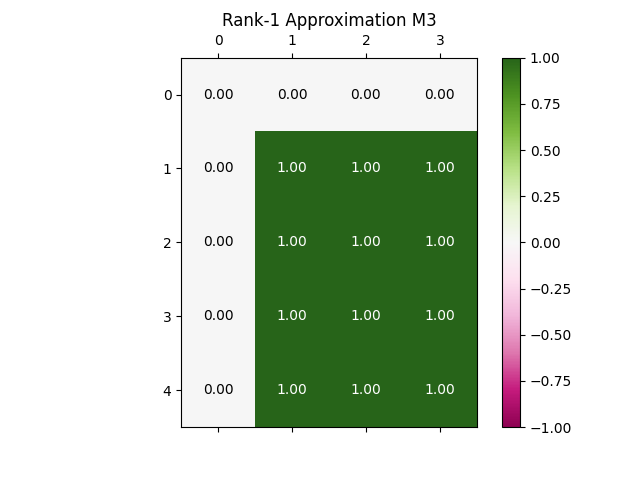

Rank-1 Approximation:


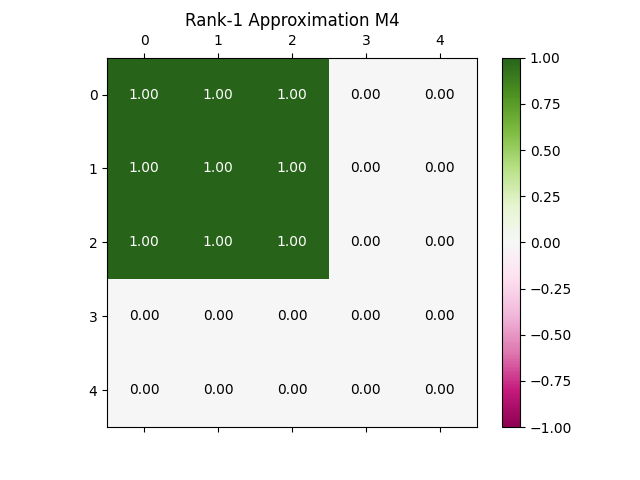

Rank-1 Approximation:


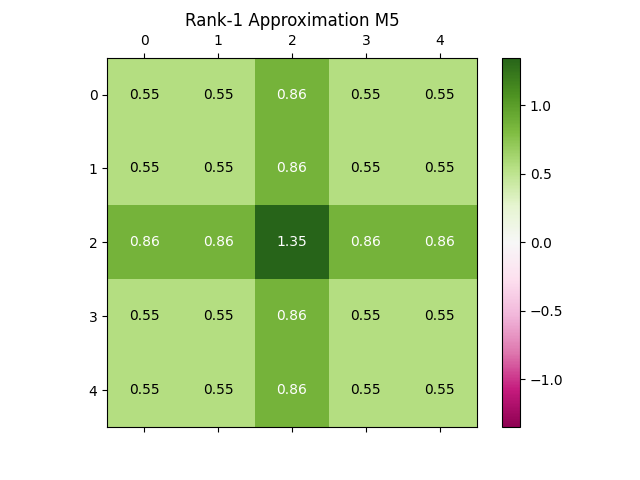

Rank-1 Approximation:


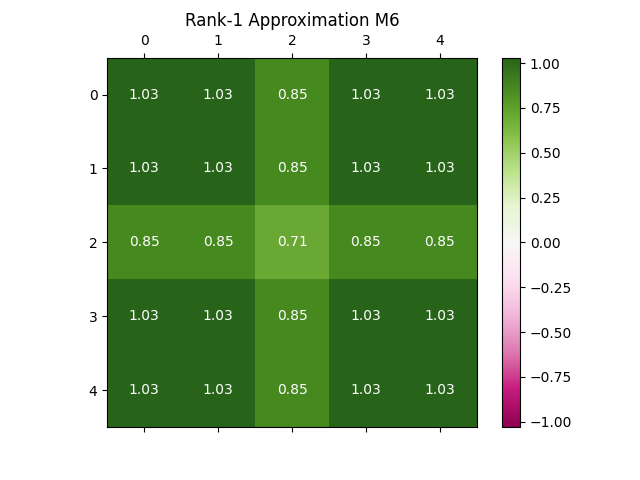

In [36]:
for name, matrix in matrices.items():

    rank_1_approx = svdcomp(matrix, components=range(1))
    
    print("Rank-1 Approximation:")
    plot_matrix(rank_1_approx, labels="{:.2f}")
    plt.title(f"Rank-1 Approximation {name}")
    plt.show()


## 1d

### Rank & Non-zero singular values

In [37]:
print("Matrix M6:")
print(M6)

Matrix M6:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 0 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [38]:
_ , s, _ = np.linalg.svd(M6)
print("\nSingular values of M6:")
print(s)


Singular values of M6:
[4.83e+00 8.28e-01 9.95e-17 2.19e-17 5.32e-50]


In [39]:
computed_rank = np.linalg.matrix_rank(M6)
print(f"Rank of M6 (reported by matrix_rank): {computed_rank}")

Rank of M6 (reported by matrix_rank): 2


# 2 The SVD on Weather Data

In [40]:
# Load the data
climate = pd.read_csv("data/worldclim.csv")
coord = pd.read_csv("data/worldclim_coordinates.csv")
lon = coord["lon"]
lat = coord["lat"]

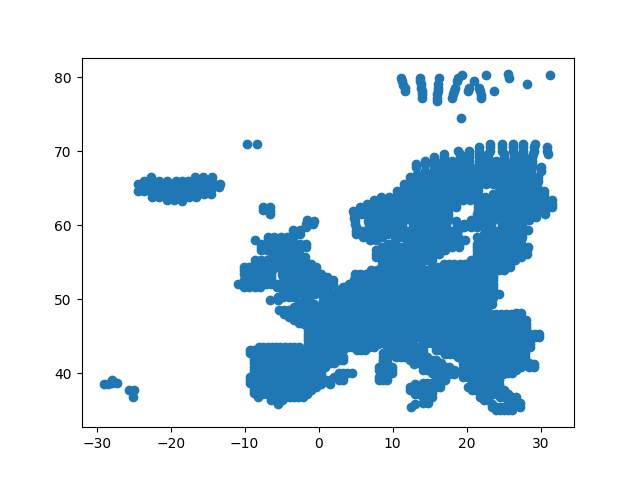

In [41]:
# Plot the coordinates
plot_xy(lon, lat)

## 2a

In [42]:
# YOUR PART
# Normalize the data to z-scores. Store the result in X.
X = (climate - climate.mean()) / climate.std()

print(f'For each feature, its mean is (approximately) equal to zero: {(X.mean().abs() < 1e-6).all()}')
print(f'For each feature, its standard deviation is (approximately) equal to 1:{(X.std().sub(1).abs() < 1e-6).all()}')

For each feature, its mean is (approximately) equal to zero: True
For each feature, its standard deviation is (approximately) equal to 1:True


/var/folders/t3/h38q5w_d36ncdxty42rj79mr0000gn/T/ipykernel_53677/2722728386.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X.hist(ax=plt.gca())


array([[<Axes: title={'center': 'min1'}>,
        <Axes: title={'center': 'min2'}>,
        <Axes: title={'center': 'min3'}>,
        <Axes: title={'center': 'min4'}>,
        <Axes: title={'center': 'min5'}>,
        <Axes: title={'center': 'min6'}>,
        <Axes: title={'center': 'min7'}>],
       [<Axes: title={'center': 'min8'}>,
        <Axes: title={'center': 'min9'}>,
        <Axes: title={'center': 'min10'}>,
        <Axes: title={'center': 'min11'}>,
        <Axes: title={'center': 'min12'}>,
        <Axes: title={'center': 'max1'}>,
        <Axes: title={'center': 'max2'}>],
       [<Axes: title={'center': 'max3'}>,
        <Axes: title={'center': 'max4'}>,
        <Axes: title={'center': 'max5'}>,
        <Axes: title={'center': 'max6'}>,
        <Axes: title={'center': 'max7'}>,
        <Axes: title={'center': 'max8'}>,
        <Axes: title={'center': 'max9'}>],
       [<Axes: title={'center': 'max10'}>,
        <Axes: title={'center': 'max11'}>,
        <Axes: title={'cen

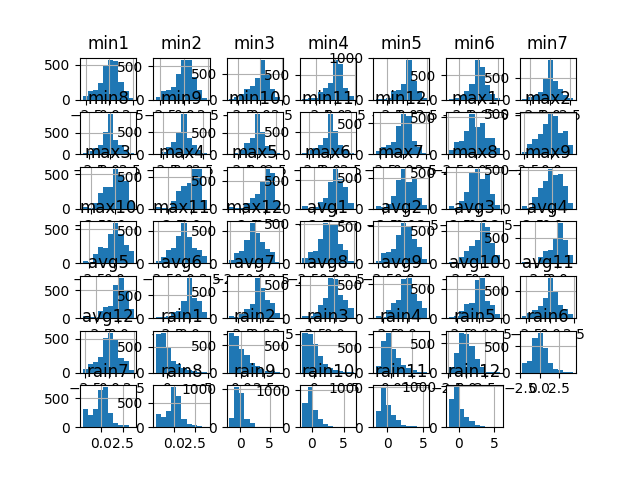

In [43]:
# Plot histograms of attributes
nextplot()
X.hist(ax=plt.gca())

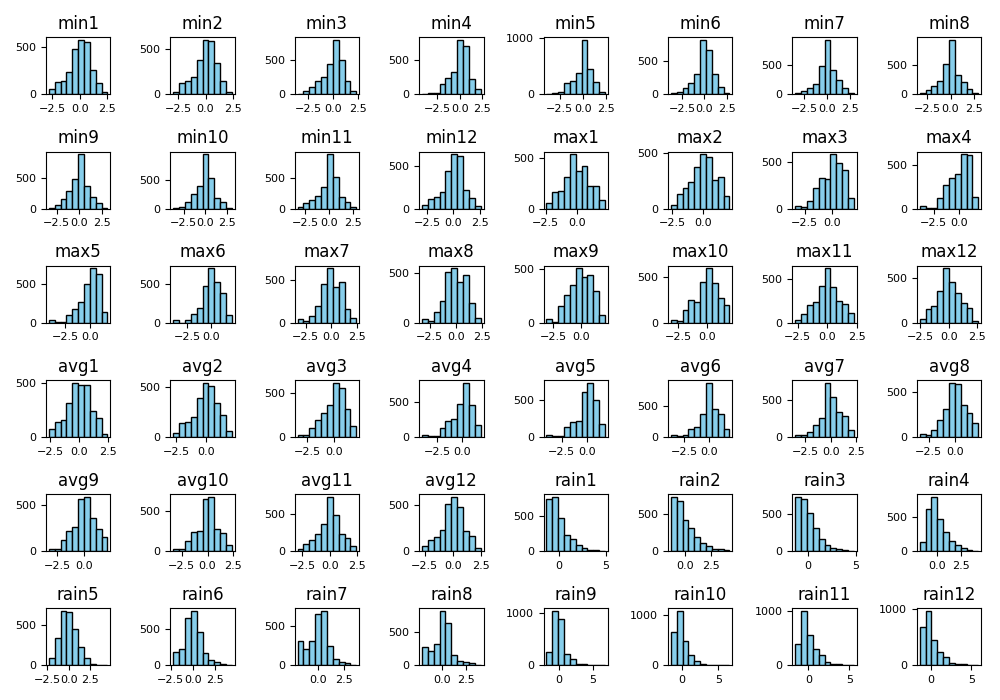

In [44]:
# Plotting histograms of attributes with adjusted layout for improved readability
fig, axes = plt.subplots(nrows=6, ncols=8, figsize=(10, 7))

# Flatten the axes array to make it easier to iterate through
axes = axes.flatten()

for i, column in enumerate(X.columns):
    axes[i].hist(X.iloc[:, i], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{column}')
    axes[i].tick_params(axis='both', which='major', labelsize=8)



# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## 2b

In [45]:
# Compute the SVD of the normalized climate data and store it in variables U,s,Vt. What
# is the rank of the data?
# YOUR PART
U, s, Vt = np.linalg.svd(X)
S = np.diag(s)

rank_X = np.sum(s > 1e-10)
print(f'Rank of the data is {rank_X}')

Rank of the data is 48


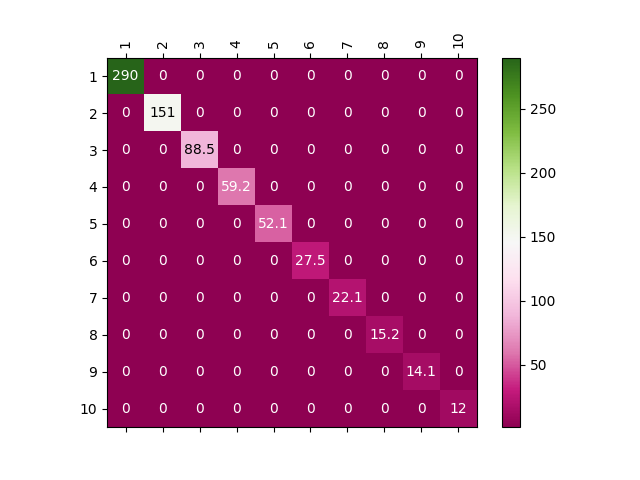

In [46]:
# plot the first ten singular values in the matrix S
plot_matrix(S[:10, :10], lim=(1, S.max()), rownames = range(1,11), colnames = range(1,11))

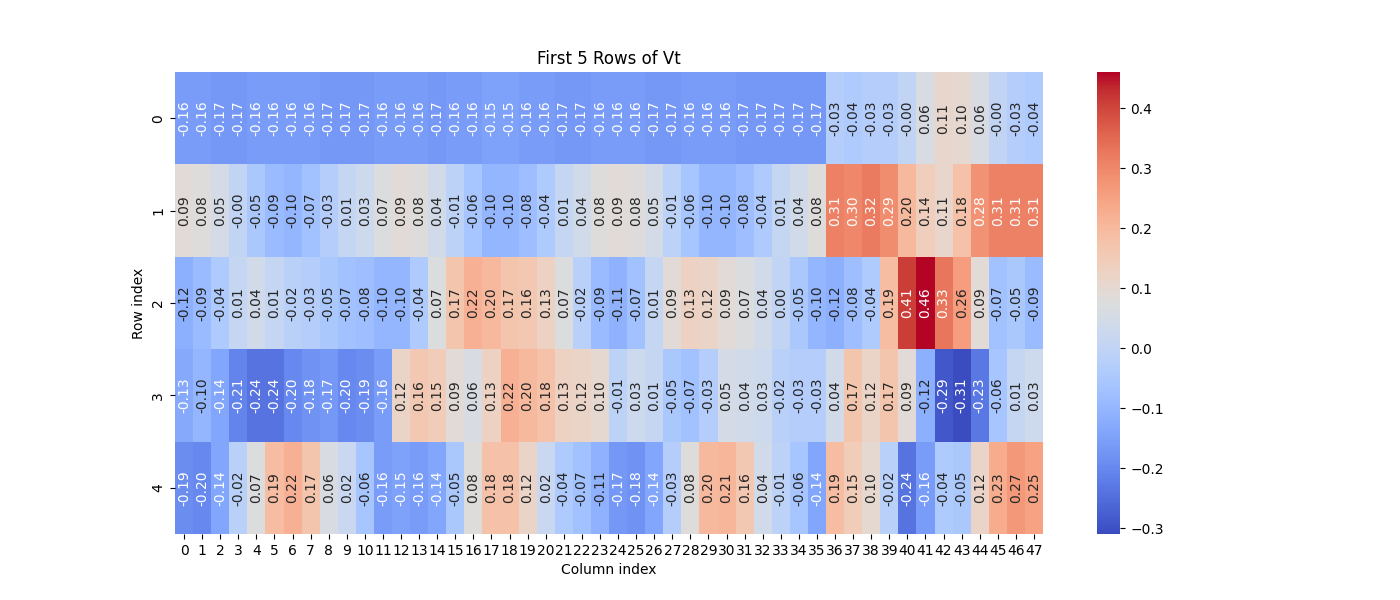

In [47]:
# plotting the first five rows of the Vt matrix 
# we will use the heatmap to get an intuition about the magnitude and sign of the values
import seaborn as sns

plt.figure(figsize=(14, 6))  
sns.heatmap(
    np.round(Vt[:5, :], 2), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    annot_kws={"rotation": 90} 
)

plt.xlabel("Column index")
plt.ylabel("Row index")
plt.title("First 5 Rows of Vt")
plt.show()

## 2c

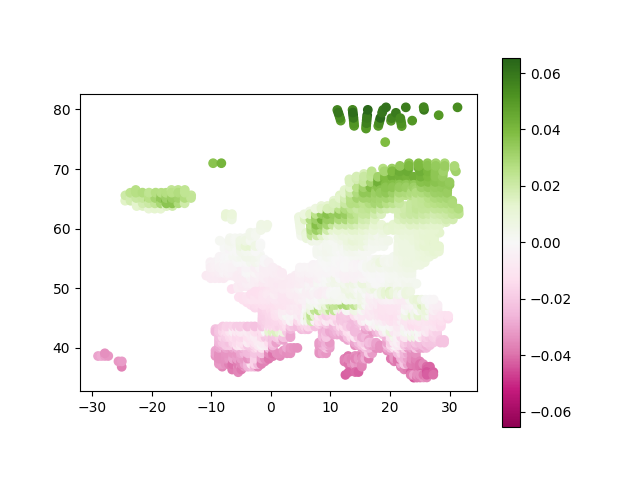

In [48]:
# Here is an example plot.
plot_xy(lon, lat, U[:, 0])

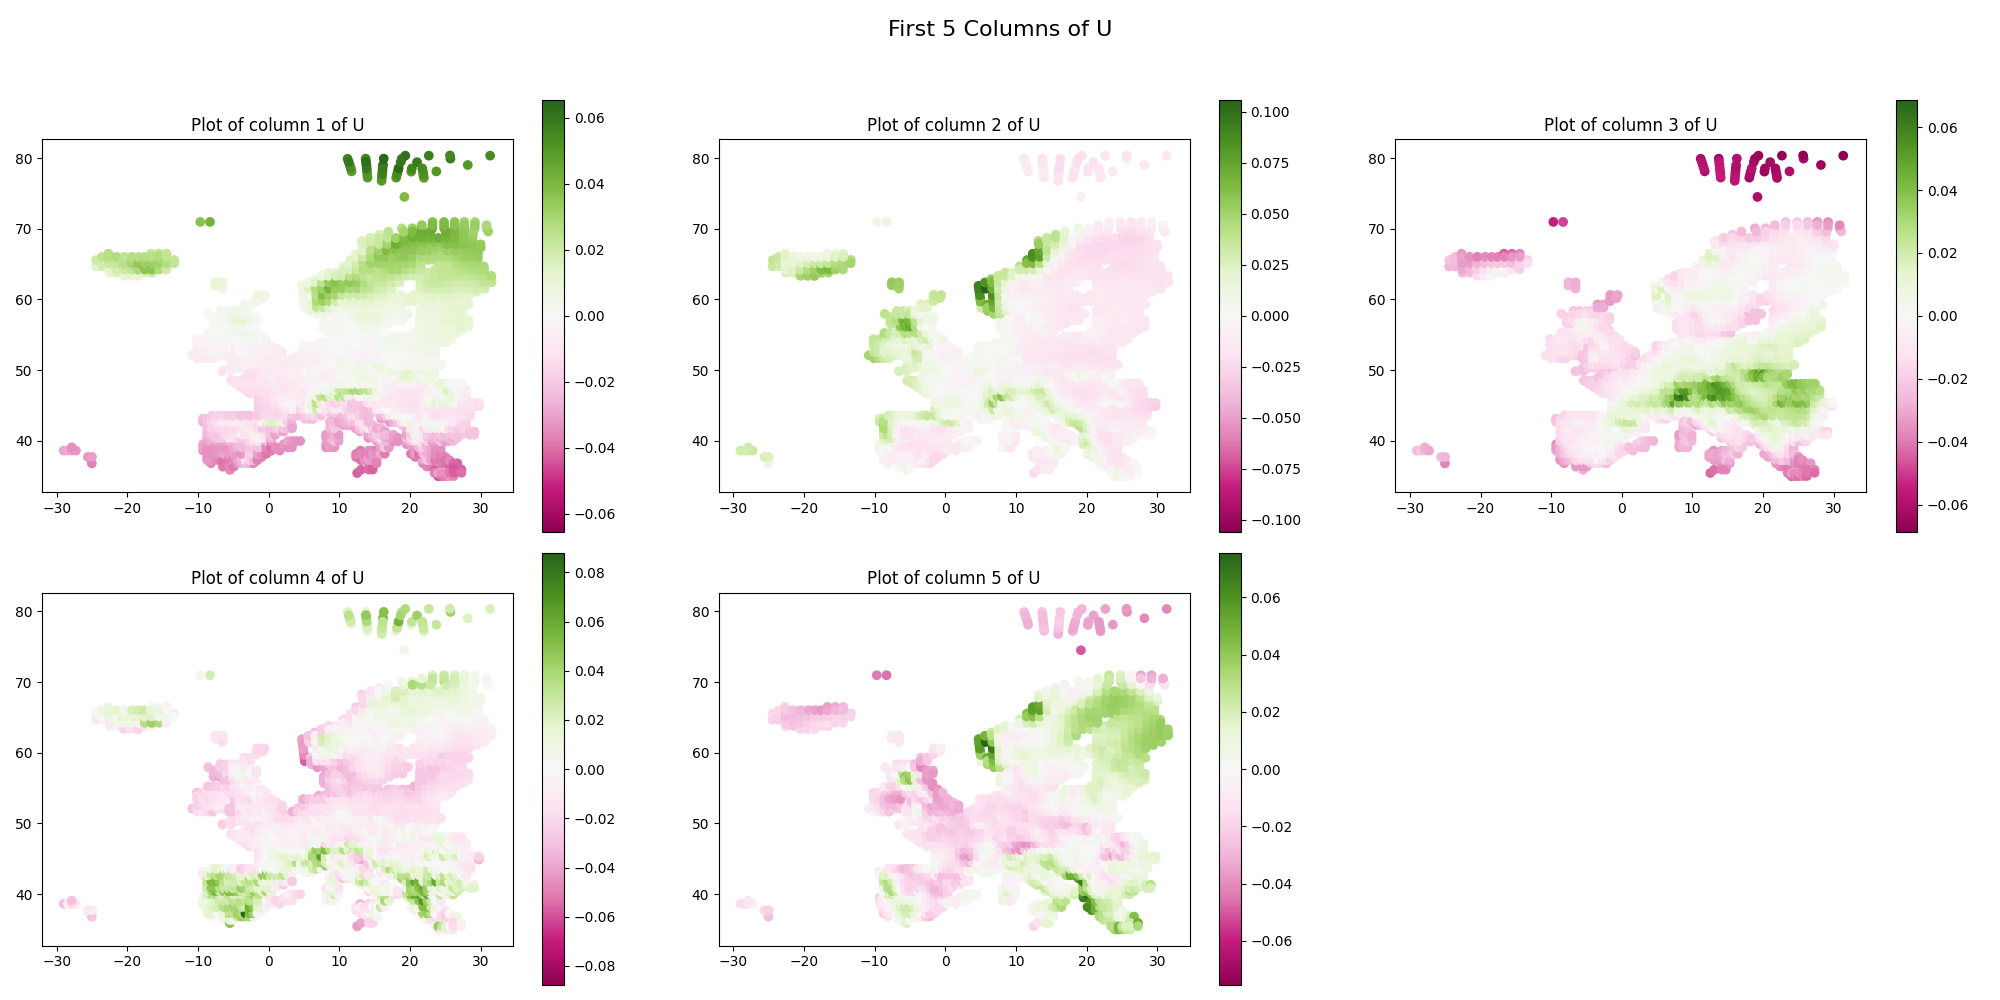

In [49]:
# We will plot each of the first five features as subplots for the presentation convenience

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.flatten()

# ploting each column in a separate axis with a corresponding title, unused 6th axis will be removed
for i in range(5):
    plot_xy(lon, lat, U[:, i], aspect = 1, axis=axs[i])  # Use 'axis' for each subplot
    axs[i].set_title(f'Plot of column {i+1} of U')  # Add a title to each subplot

fig.delaxes(axs[5])  

fig.suptitle("First 5 Columns of U", fontsize=16)

# adjusting alignment to use more space
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Slightly increase padding
plt.subplots_adjust(wspace=0.15, hspace=0.05)  # Adjust space between subplots

plt.show()

In [50]:
#nextplot
#plot_matrix(Vt[:5, :5])
np.set_printoptions(precision=2)
# first row of Vt
print(Vt[0, :12]) #min1-12
print(Vt[0, 12:24]) #max1-12
print(Vt[0, 24:36]) #avg1-12
print(Vt[0, 36:]) #rain1-12

[-0.16 -0.16 -0.17 -0.17 -0.16 -0.16 -0.16 -0.16 -0.17 -0.17 -0.17 -0.16]
[-0.16 -0.16 -0.17 -0.16 -0.16 -0.15 -0.15 -0.16 -0.16 -0.17 -0.17 -0.16]
[-0.16 -0.16 -0.17 -0.17 -0.16 -0.16 -0.16 -0.17 -0.17 -0.17 -0.17 -0.17]
[-0.03 -0.04 -0.03 -0.03 -0.    0.06  0.11  0.1   0.06 -0.   -0.03 -0.04]


In [51]:
# second row of Vt
print(Vt[1, :12]) #min1-12
print(Vt[1, 12:24]) #max1-12
print(Vt[1, 24:36]) #avg1-12
print(Vt[1, 36:]) #rain1-12

[ 0.09  0.08  0.05 -0.   -0.05 -0.09 -0.1  -0.07 -0.03  0.01  0.03  0.07]
[ 0.09  0.08  0.04 -0.01 -0.06 -0.1  -0.1  -0.08 -0.04  0.01  0.04  0.08]
[ 0.09  0.08  0.05 -0.01 -0.06 -0.1  -0.1  -0.08 -0.04  0.01  0.04  0.08]
[0.31 0.3  0.32 0.29 0.2  0.14 0.11 0.18 0.28 0.31 0.31 0.31]


In [52]:
# third row of Vt
print(Vt[2, :12]) #min1-12
print(Vt[2, 12:24]) #max1-12
print(Vt[2, 24:36]) #avg1-12
print(Vt[2, 36:]) #rain1-12

[-0.12 -0.09 -0.04  0.01  0.04  0.01 -0.02 -0.03 -0.05 -0.07 -0.08 -0.1 ]
[-0.1  -0.04  0.07  0.17  0.22  0.2   0.17  0.16  0.13  0.07 -0.02 -0.09]
[-0.11 -0.07  0.01  0.09  0.13  0.12  0.09  0.07  0.04  0.   -0.05 -0.1 ]
[-0.12 -0.08 -0.04  0.19  0.41  0.46  0.33  0.26  0.09 -0.07 -0.05 -0.09]


In [53]:
# fourth row of Vt
print(Vt[3, :12]) #min1-12
print(Vt[3, 12:24]) #max1-12
print(Vt[3, 24:36]) #avg1-12
print(Vt[3, 36:]) #rain1-12

[-0.13 -0.1  -0.14 -0.21 -0.24 -0.24 -0.2  -0.18 -0.17 -0.2  -0.19 -0.16]
[0.12 0.16 0.15 0.09 0.06 0.13 0.22 0.2  0.18 0.13 0.12 0.1 ]
[-0.01  0.03  0.01 -0.05 -0.07 -0.03  0.05  0.04  0.03 -0.02 -0.03 -0.03]
[ 0.04  0.17  0.12  0.17  0.09 -0.12 -0.29 -0.31 -0.23 -0.06  0.01  0.03]


In [54]:
# fifth row of Vt
print(Vt[4, :12]) #min1-12
print(Vt[4, 12:24]) #max1-12
print(Vt[4, 24:36]) #avg1-12
print(Vt[4, 36:]) #rain1-12

[-0.19 -0.2  -0.14 -0.02  0.07  0.19  0.22  0.17  0.06  0.02 -0.06 -0.16]
[-0.15 -0.16 -0.14 -0.05  0.08  0.18  0.18  0.12  0.02 -0.04 -0.07 -0.11]
[-0.17 -0.18 -0.14 -0.03  0.08  0.2   0.21  0.16  0.04 -0.01 -0.06 -0.14]
[ 0.19  0.15  0.1  -0.02 -0.24 -0.16 -0.04 -0.05  0.12  0.23  0.27  0.25]


In [55]:
np.set_printoptions()

## 2d

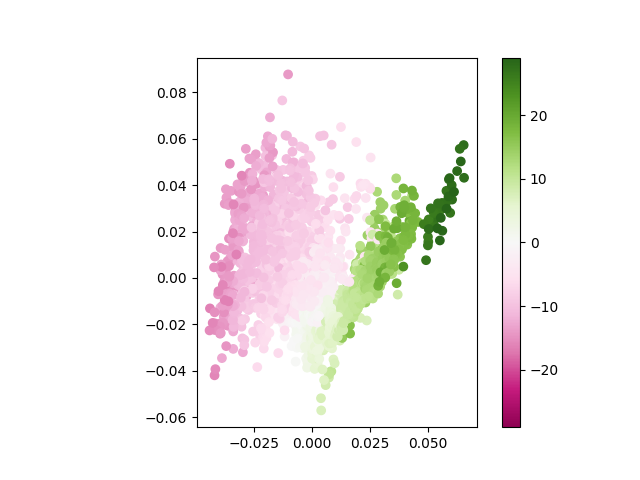

In [56]:
# Here is an example.
plot_xy(U[:, 0], U[:, 3], lat - np.mean(lat))

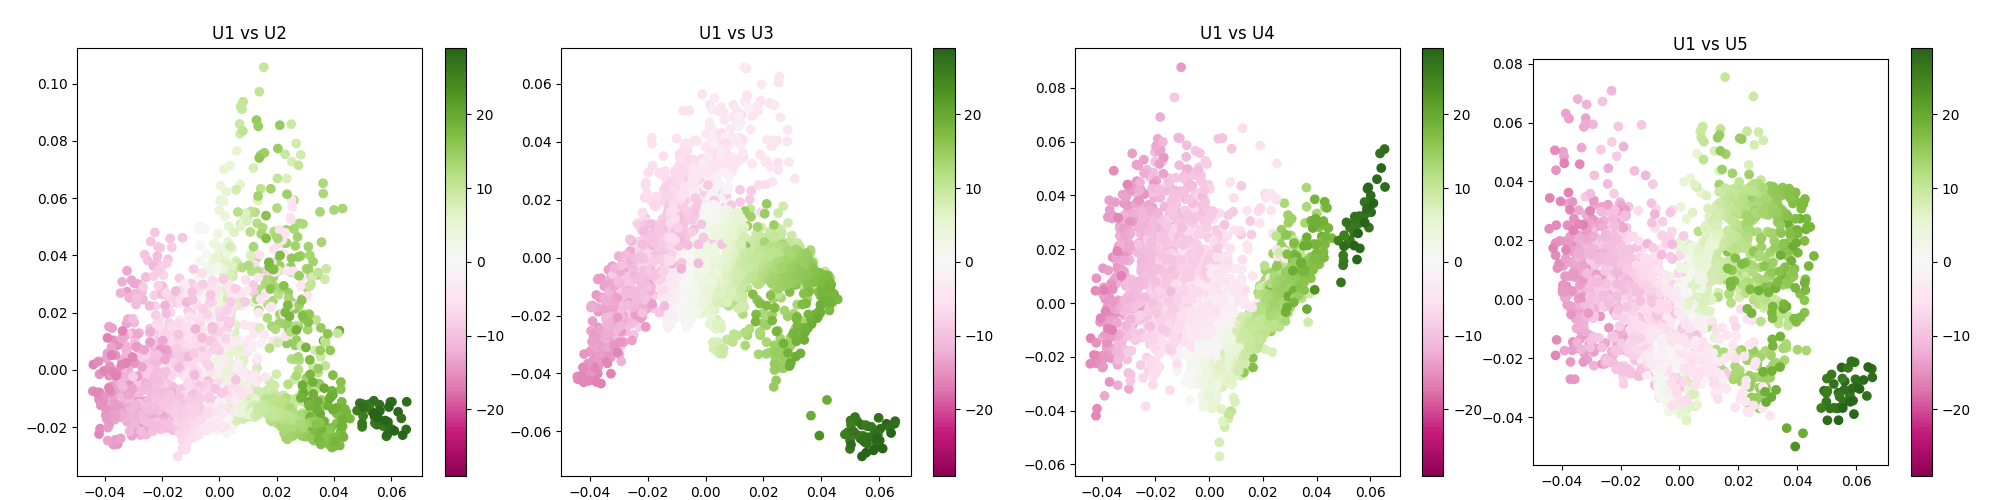

In [57]:
# We will plot the first column of U against each of the following for columns of U for North-South location

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs = axs.flatten()

# ploting each pair of columns in a separate axis with a corresponding title
for i in range(1, 5):
    plot_xy(U[:, 0], U[:, i], lat - np.mean(lat), axis=axs[i-1]) 
    axs[i-1].set_title(f'U1 vs U{i+1}')    


# adjusting padding and alignment to use more space
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.subplots_adjust(wspace=0.1)  
plt.show()

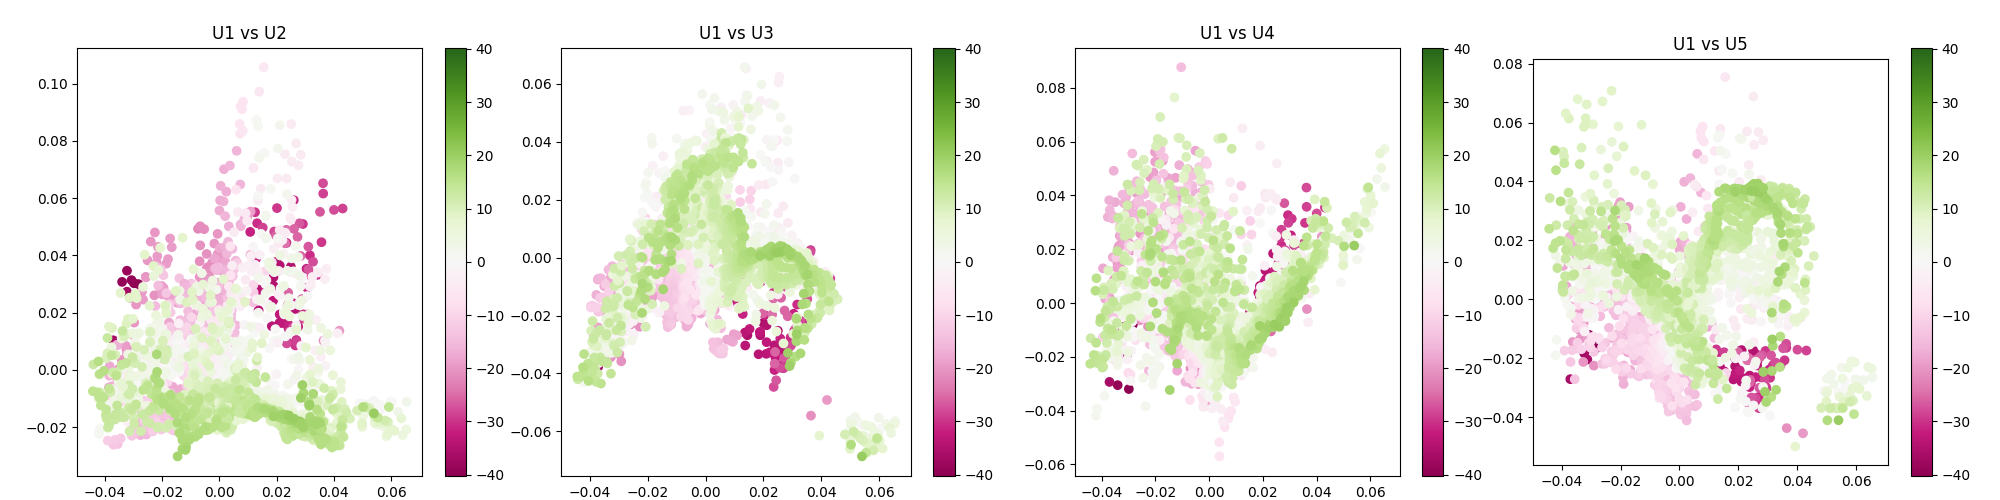

In [58]:
# Next, we will plot the first column of U against each of the following for columns of U for Easth-West location

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs = axs.flatten()

# ploting each pair of columns in a separate axis with a corresponding title
for i in range(1, 5):
    plot_xy(U[:, 0], U[:, i], lon - np.mean(lon), axis=axs[i-1]) 
    axs[i-1].set_title(f'U1 vs U{i+1}')    


# adjusting padding and alignment to use more space
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.subplots_adjust(wspace=0.1)  
plt.show()

Text(0.5, 1.0, 'East-West location')

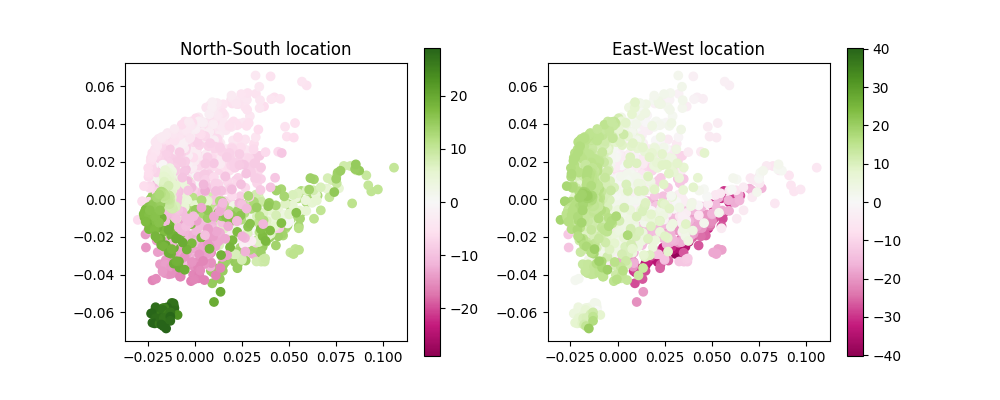

In [59]:
# we will also take a look at the relation between U2 and U3 
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

plot_xy(U[:, 1], U[:, 2], lat - np.mean(lat), axis=axs[0]) 
axs[0].set_title(f'North-South location')
plot_xy(U[:, 1], U[:, 2], lon - np.mean(lon), axis=axs[1]) 
axs[1].set_title(f'East-West location')


## 2e

In [60]:
# 2e(i) Guttman-Kaiser
# YOUR PART
# selecting a k such that for all i > k, singular value i < 1
print(f'k selected by Guttman-Kaiser method: {np.sum(s>1)}')

k selected by Guttman-Kaiser method: 37


In [61]:
# 2e(ii) 90% squared Frobenius norm
# YOUR PART
# establishing the threshold of 90% of squared Frobenius norm
threshold = 0.9 * (np.linalg.norm(X, 'fro') ** 2)
sum_of_squares = 0

squared_s = s**2
# aggregating sum of squares of singluar values starting from the largest until it gets equal or larger than threshold
for i in range(len(s)):
    sum_of_squares += squared_s[i]
    if sum_of_squares >= threshold:
        break
print(f'k selected by the method of 90% squared Frobenius norm: {i+1}')

k selected by the method of 90% squared Frobenius norm: 3


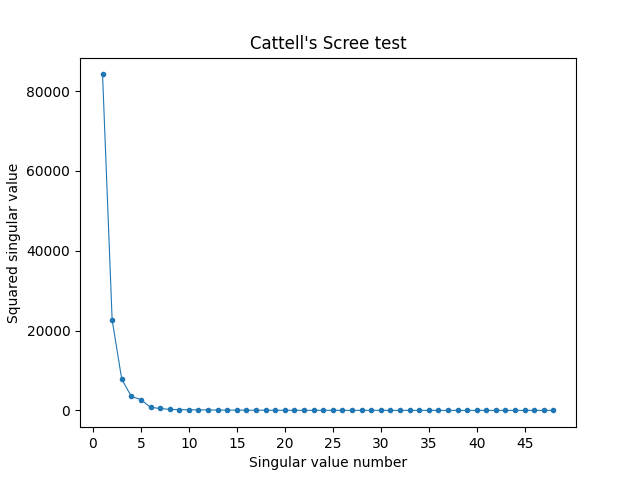

By visual examination of the Scree plot, we choose k equal to 6


In [62]:
# 2e(iii) Scree test

# plotting squared singular values in decreasing order (the Scree plot)
nextplot()
plt.plot(np.arange(1, len(s)+1), squared_s, marker='.', linestyle='-', linewidth = 0.8)

# labeling and adding ticks to the axes
plt.xlabel('Singular value number')
plt.ylabel('Squared singular value')
xticks = np.arange(0, len(s)+1, 5)  
plt.xticks(xticks)

plt.title('Cattell\'s Scree test')
plt.show()

print(f'By visual examination of the Scree plot, we choose k equal to 6')

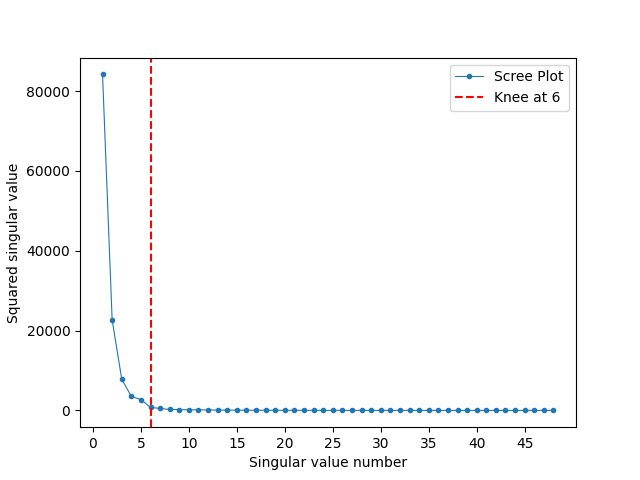

Optimal number of singular values (knee): 6


In [63]:
# to check our choice of k=6 from visual examination of the scree plot, we will use a 
# Knee Locator algorithm (https://pypi.org/project/kneed/) to identify the point of maximum curvature
# %pip install kneed
from kneed import KneeLocator

# applyting KneeLocator to find the "elbow"
knee = KneeLocator(
    range(1, len(squared_s) + 1),
    squared_s,
    curve="convex",
    direction="decreasing"
)
# plotting the Scree plot with the detected knee point
nextplot()

plt.plot(range(1, len(squared_s) + 1), squared_s, marker='.', linewidth = 0.8, label="Scree Plot")
plt.axvline(x=knee.knee, color = 'r', linestyle='--', label=f'Knee at {knee.knee}')
xticks = np.arange(0, len(s)+1, 5) 
plt.xticks(xticks)
plt.xlabel('Singular value number')
plt.ylabel('Squared singular value')
plt.legend()
plt.show()

print(f"Optimal number of singular values (knee): {knee.knee}")

In [64]:
# 2e(iv) entropy
# calculating relative contrubition of each singular value
f = squared_s / np.sum(squared_s)
entropy = - (1/np.log(min(S.shape[0], S.shape[1]))) * np.sum(f * np.log(f))
print (f'Entropy: {entropy}')
# searching for the smalles k such that the sum of relative contributions up to k-th singular value 
# is equal or larger than the entropy
sum_of_f = 0
for i in range(len(f)):
    sum_of_f += f[i]
    if sum_of_f >= entropy:
        break
print(f'k selected by entropy-based method: {i+1}')


Entropy: 0.2752163447341983
k selected by entropy-based method: 1


In [65]:
# 2e(v) random flips
# Random sign matrix: np.random.choice([-1,1], X.shape)
# YOUR PART
 
np.random.seed(42)
 
# checking different values of k
changes = []

for k in range(1, min(X.shape[0], X.shape[1])+1):
    # defining the residual matrix for given k
    X_k = svdcomp(X, range(k))
    X_minus_k = X - X_k

    # constructing X_tilda_-k from the residual matrix by flipping signs
    signs = np.random.choice([-1, 1], size = X_minus_k.shape)
    X_tilda_minus_k = X_minus_k * signs

    # computing the relative difference 
    change = (np.linalg.norm(X_minus_k, ord=2) - np.linalg.norm(X_tilda_minus_k, ord=2)) / np.linalg.norm(X_minus_k, ord='fro')

    print(f"k={k}, difference ={change:.6f}")

    changes.append(change)



k=1, difference =0.478194
k=2, difference =0.351524
k=3, difference =0.395349
k=4, difference =0.461332
k=5, difference =0.236031
k=6, difference =0.194869
k=7, difference =0.111044
k=8, difference =0.169182
k=9, difference =0.119629
k=10, difference =0.151240
k=11, difference =0.171992
k=12, difference =0.137750
k=13, difference =0.114050
k=14, difference =0.141650
k=15, difference =0.140642
k=16, difference =0.169491
k=17, difference =0.173571
k=18, difference =0.151970
k=19, difference =0.149593
k=20, difference =0.200942
k=21, difference =0.175650
k=22, difference =0.166248
k=23, difference =0.150726
k=24, difference =0.152478
k=25, difference =0.175884
k=26, difference =0.139230
k=27, difference =0.172028
k=28, difference =0.188804
k=29, difference =0.180012
k=30, difference =0.173909
k=31, difference =0.197062
k=32, difference =0.253494
k=33, difference =0.252325
k=34, difference =0.233611
k=35, difference =0.221058
k=36, difference =0.256456
k=37, difference =0.299118
k=38, diff

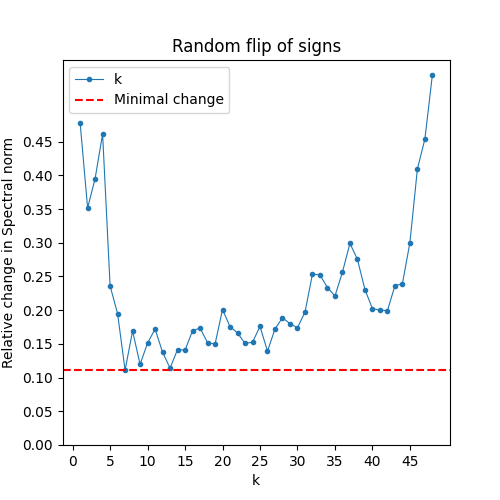

Minimal change at 0.11104352797242743 with k=7


In [66]:
# we will plot the relative change in spectral norms as the function of k and choose the k with the minimal change value
plt.figure(figsize=(5, 5))
plt.plot(np.arange(1, len(s)+1), changes, marker='.', linestyle='-', linewidth = 0.8, label="k")

# labeling and adding ticks to the axes
plt.xlabel('k')
plt.ylabel('Relative change in Spectral norm')
xticks = np.arange(0, len(s)+1, 5)  
yticks = np.arange(0, 0.5, 0.05)
plt.xticks(xticks)
plt.yticks(yticks)

# showing the minimal value
plt.axhline(y=min(changes), color='r', linestyle='--', label='Minimal change')

plt.legend()
plt.title('Random flip of signs')
plt.show()

print(f'Minimal change at {min(changes)} with k={np.argmin(changes)+1}')

## 2f

In [67]:
# Here is the empty plot that you need to fill (one line per choice of k: RSME between
# original X and the reconstruction from size-k SVD of noisy versions)
# YOUR PART

# defining the ranges of values for k and epsilon
k_range = [1, 2, 5, 10, 48]
epsilon_range = np.arange(0, 2.1, 0.1)

RMSE_results = {}

# computing RMSE for different values of k and epsilon
for k in k_range:
    RMSE_k = []
    for e in epsilon_range:
        X_noise = X + np.random.randn(*X.shape) * e
        X_approx = svdcomp(X_noise, range(k))
        RMSE = 1/(np.sqrt(X.shape[0] * X.shape[1])) * np.linalg.norm(X - X_approx, ord='fro')
        RMSE_k.append(RMSE)
    RMSE_results[k] = RMSE_k



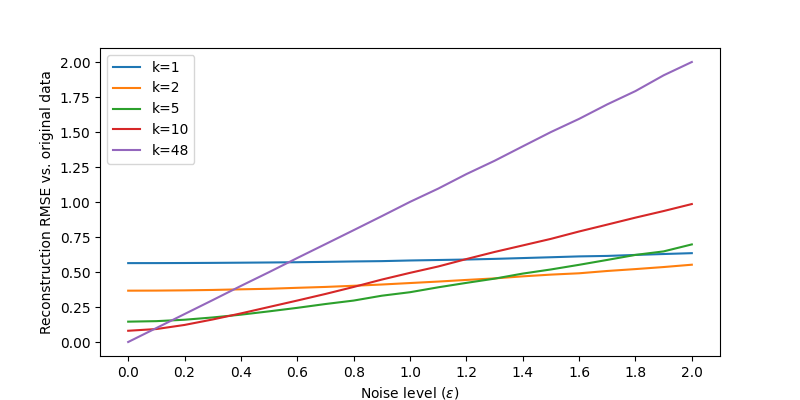

In [68]:
   
plt.figure(figsize=(8, 4))
for k, rmse_values in RMSE_results.items():
    plt.plot(epsilon_range, rmse_values, label=f'k={k}')

# adding labels, title and legend
plt.xlabel(r"Noise level ($\epsilon$)")
xticks = np.arange(0, 2.1, 0.2) 
plt.xticks(xticks)
plt.ylabel("Reconstruction RMSE vs. original data")
plt.legend()

plt.show()

In [69]:
X_approx = svdcomp(X, range(1))
RMSE = 1/(np.sqrt(X.shape[0] * X.shape[1])) * np.linalg.norm(X - X_approx, ord='fro')
RMSE

0.5642797271156014

# 3 SVD and k-means

In [70]:
# Cluster the normalized climate data into 5 clusters using k-means and store
# the vector giving the cluster labels for each location.
X_clusters = KMeans(5).fit(X).labels_

## 3a

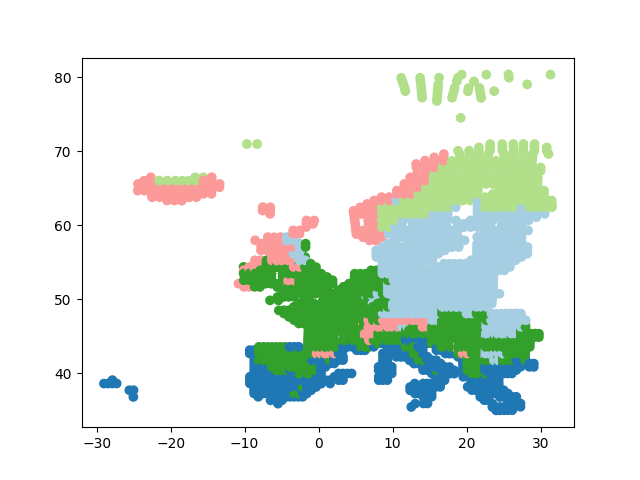

In [71]:
# Plot the results to the map: use the cluster labels to give the color to each
# point.
plot_xy(lon, lat, X_clusters)

## 3b

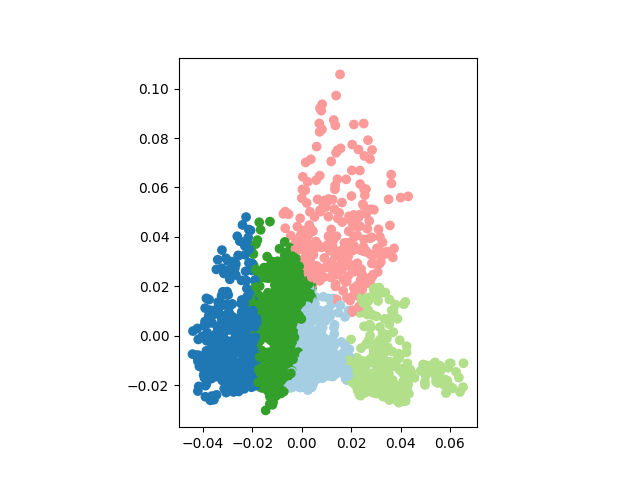

In [72]:
# YOUR PART HERE
plot_xy(U[:, 0], U[:, 1], X_clusters)

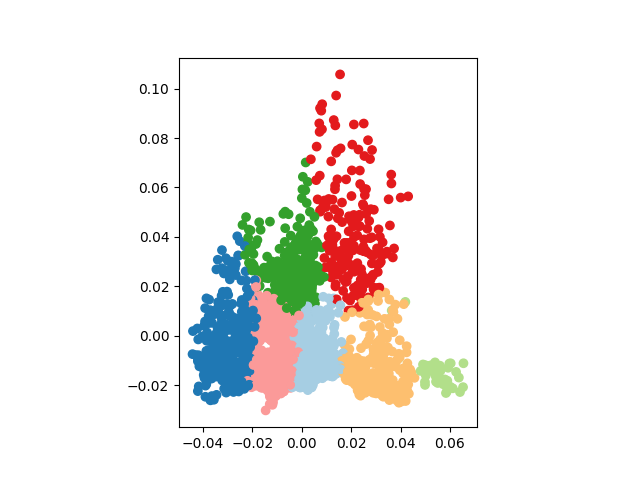

In [73]:
# applying K-Means for clustering with K=7 and plotting the results in singular vector space
X_clusters_7 = KMeans(7).fit(X).labels_
plot_xy(U[:, 0], U[:, 1], X_clusters_7)

## 3c

In [74]:
# Compute the PCA scores, store in Z (of shape N x k)
k1 = 1
k2 = 2
k3 = 3
# YOUR PART HERE
#computing score matrix
Z1 = U[:, :k1] * np.diag(S)[:k1]
Z2 = U[:, :k2] * np.diag(S)[:k2]
Z3 = U[:, :k3] * np.diag(S)[:k3]

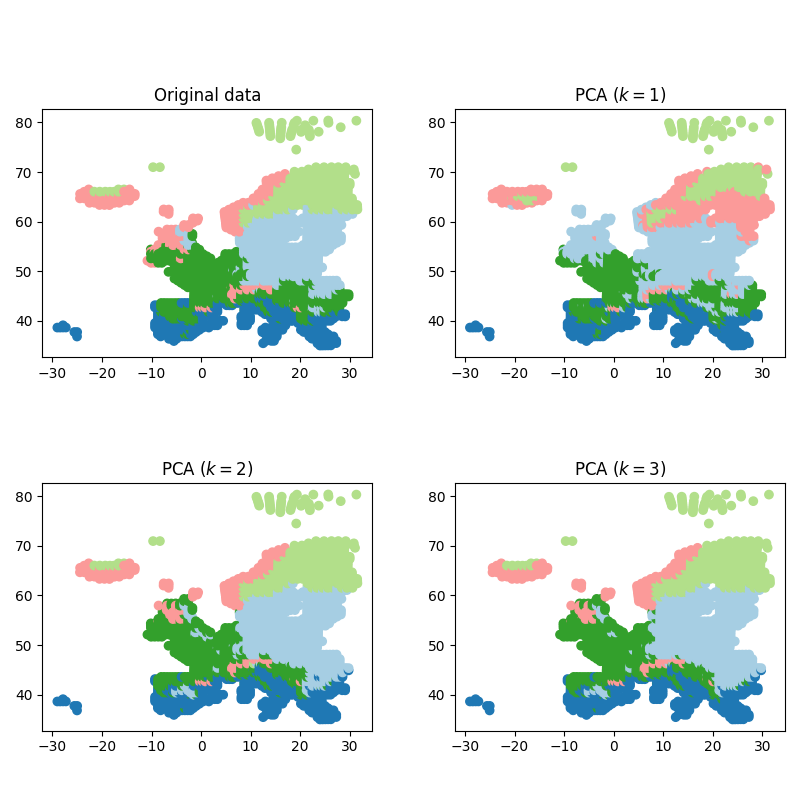

In [75]:
# cluster and visualize
Z1_clusters = KMeans(5).fit(Z1).labels_
Z2_clusters = KMeans(5).fit(Z2).labels_
Z3_clusters = KMeans(5).fit(Z3).labels_
# match clusters as well as possible (try without)
Z1_clusters = match_categories(X_clusters, Z1_clusters)
Z2_clusters = match_categories(X_clusters, Z2_clusters)
Z3_clusters = match_categories(X_clusters, Z3_clusters)

#nextplot()
plt.figure(figsize=(8,8))
axs = plt.gcf().subplots(2, 2)
axs = axs.flatten()
plot_xy(lon, lat, X_clusters, axis=axs[0])
axs[0].set_title("Original data")
plot_xy(lon, lat, Z1_clusters, axis=axs[1])
axs[1].set_title(f"PCA $(k={1}$)")
plot_xy(lon, lat, Z2_clusters, axis=axs[2])
axs[2].set_title(f"PCA $(k={2}$)")
plot_xy(lon, lat, Z3_clusters, axis=axs[3])
axs[3].set_title(f"PCA $(k={3}$)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.25, hspace=0.05) 
